In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("rainbow")
sns.set_context("talk")


In [3]:
df = pd.read_csv("./data/HistoricalProductDemand.csv")

In [5]:
df["Date"] = pd.to_datetime(df["Date"]) # Convert Dates
df["Order_Demand"] = df["Order_Demand"].fillna(0).apply(lambda x: pd.to_numeric(x, errors='coerce')) # Convert to Float
df = df.dropna() # Remove rows with NaN

In [6]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Product_Code,Warehouse,Product_Category,Date,Order_Demand


In [7]:
len(df)

1031437

In [130]:
df = df.sort_values(by=["Product_Code"])
product_codes = df["Product_Code"].drop_duplicates()

In [131]:
counts = df.groupby("Product_Code").size()
counts = counts.to_dict()

In [132]:
counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

In [133]:
for idx, (k, v) in enumerate(counts.items()):
    print(f"{k}: {v}")
    
    if idx == 2:
        break

Product_1359: 16912
Product_1295: 10554
Product_1378: 9750


In [226]:
demand_1359 = df[df["Product_Code"] == 'Product_1359'].drop(columns=["Product_Code", "Warehouse", "Product_Category"])
demand_1295 = df[df["Product_Code"] == 'Product_1295'].drop(columns=["Product_Code", "Warehouse", "Product_Category"])

In [227]:
demand_1359.sort_values(by="Date", inplace=True)
demand_1295.sort_values(by="Date", inplace=True)


In [228]:
demand_1359["Total_Demand"] = demand_1359.groupby("Date")["Order_Demand"].transform('sum')
demand_1295["Total_Demand"] = demand_1295.groupby("Date")["Order_Demand"].transform('sum')


In [229]:
demand_1359.drop_duplicates(subset=["Date"], inplace=True)
demand_1359.drop(columns="Order_Demand", inplace=True)
demand_1359.set_index("Date", inplace=True)

demand_1295.drop_duplicates(subset=["Date"], inplace=True)
demand_1295.drop(columns="Order_Demand", inplace=True)
demand_1295.set_index("Date", inplace=True)



In [216]:
demand_1359

,Total_Demand
Date,
2012-01-05,702000.0
2012-01-06,676000.0
2012-01-10,783000.0
2012-01-11,200000.0
2012-01-12,284000.0
...,...
2016-12-22,180000.0
2016-12-26,286000.0
2016-12-27,90000.0


In [217]:
demand_1295

,Total_Demand
Date,
2012-01-05,78700.0
2012-01-06,102100.0
2012-01-10,134000.0
2012-01-11,37600.0
2012-01-12,32100.0
...,...
2016-12-22,220000.0
2016-12-25,0.0
2016-12-26,300000.0


In [218]:
demand_1359.describe()

,Total_Demand
count,1.232000e+03
mean,3.827857e+05
std,2.880284e+05
min,0.000000e+00
25%,1.917500e+05
50%,3.100000e+05
75%,4.952500e+05
max,2.257000e+06


In [219]:
demand_1295.describe()

,Total_Demand
count,1217.000000
mean,100778.553821
std,64301.458058
min,0.000000
25%,56000.000000
50%,90000.000000
75%,131000.000000
max,568000.000000


In [241]:
final = pd.merge(demand_1359, demand_1295, on="Date")
final.rename({
    'Total_Demand_x': 'demand_1359',
    'Total_Demand_y': 'demand_1295',
}, axis='columns', inplace=True)

In [242]:
final.describe()

,demand_1359,demand_1295
count,1.207000e+03,1207.000000
mean,3.895302e+05,101404.722452
std,2.869675e+05,64070.557494
min,2.000000e+03,100.000000
25%,1.970000e+05,57600.000000
50%,3.140000e+05,90200.000000
75%,5.010000e+05,131000.000000
max,2.257000e+06,568000.000000


<Figure size 648x360 with 0 Axes>

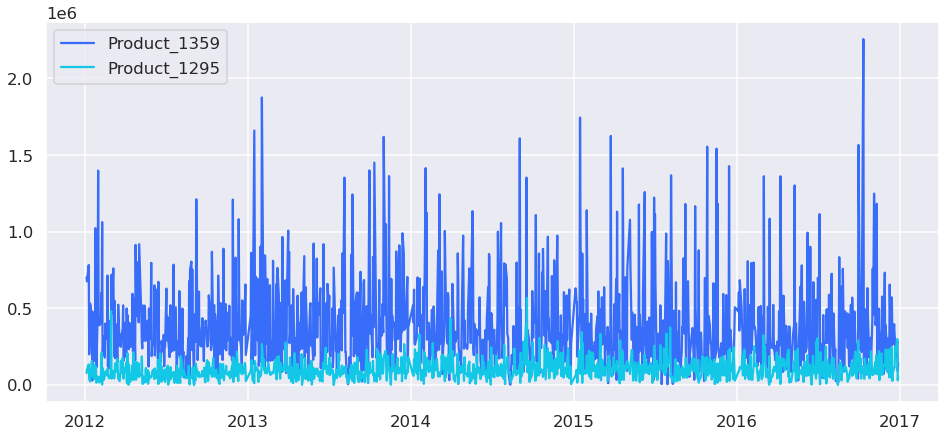

In [243]:
plt.figure(figsize=(9, 5))

f, ax = plt.subplots(1, 1, figsize=(16, 7))

ax.plot(final["demand_1359"], label="Product_1359")
ax.plot(final["demand_1295"], label="Product_1295")

ax.legend()

In [223]:
demand_1359.to_csv("./data/demand_1359.csv")

In [244]:
demand_1295.to_csv("./data/demand_1295.csv")

In [245]:
final.to_csv("./data/demand.csv")